### Ellipticity prior transform

A physically motivated prior on the ellipticity, $\epsilon \in [-1, 1]$, is

$$ p(\epsilon) = \frac{1}{2\epsilon^2} \left[ \frac{1}{\sqrt{1-\epsilon^2}} - 1 \right]. $$

We usually have a prior on the inclination, $\iota$, which has the form

$$ p'(\iota) = \frac{1}{2} \sin(\iota) \quad 0 \leq \iota \leq \pi. $$

Using the fact that the probability contained in a differential area must be invariant under change of variables, $| p(\epsilon) ~ \mathrm{d}\epsilon| = |p'(\iota) ~ \mathrm{d}\iota|$, it follows that

$$ p(\epsilon) = p'(\iota) \left| \frac{\mathrm{d}\iota}{\mathrm{d}\epsilon} \right|. $$

Quadrupole radiation from a mass in circular orbit ([Maggiore](https://inspirehep.net/literature/768483), Eq. 3.332) has the following dependence on inclination:

$$ h_+ \sim \frac{1 + \cos^2(\iota)}{2} $$

$$ h_\times \sim \cos(\iota). $$

Ignoring the phase, we can relate our ellipticity to the gravitational wave polarizations, and so the inclination, in the following way:

$$ \epsilon = \frac{h_\times}{h_+} = \frac{2\cos(\iota)}{1 + \cos^2(\iota)}. $$

This can be inverted (via the quadratic formula) to give

$$ \iota = \cos^{-1}\left( \frac{1 \pm \sqrt{1-\epsilon^2}}{\epsilon} \right). $$

The plus-sign solution has a singularity at zero, which makes the inverse cosine undefined. So we take the negative-sign solution, which we can plot:

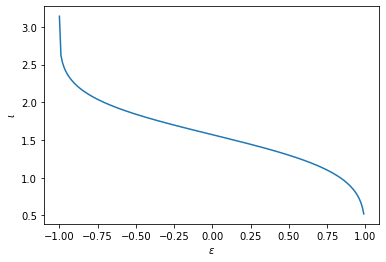

In [1]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = np.arange(-1,1,0.01)

def iota(epsilon):
    return np.arccos((1 - np.sqrt(1-epsilon**2))/epsilon)

plt.plot(epsilon, iota(epsilon))
plt.xlabel('$\epsilon$')
plt.ylabel('$\iota$')
plt.show()

If we let 

$$ \gamma = \frac{1 - \sqrt{1-\epsilon^2}}{\epsilon}, $$

then we have $ \iota = \cos^{-1}(\gamma) $ and 

\begin{align}
\left| \frac{\mathrm{d}\iota}{\mathrm{d}\epsilon} \right| &= \left| \frac{\mathrm{d}\iota}{\mathrm{d}\gamma} \frac{\mathrm{d}\gamma}{\mathrm{d}\epsilon} \right| \\
&= \left| -\frac{1}{\sqrt{1-\gamma^2}} \left[ \frac{1}{\epsilon^2 \sqrt{1-\epsilon^2}} -\frac{1}{\epsilon^2} \right] \right| \\
&= \frac{1}{\sqrt{1-\gamma^2}} \left[ \frac{1}{\epsilon^2 \sqrt{1-\epsilon^2}} -\frac{1}{\epsilon^2} \right]
\end{align}

where we see from the plot that the function has a negative derivative, so the modulus can be replaced with a minus sign.

Finally, as $ \cos(\iota) = \gamma $, then $\sin(\iota) = \sqrt{1 - \gamma^2}$, and we have

\begin{align}
p(\epsilon) &= p'(\iota) \left| \frac{\mathrm{d}\iota}{\mathrm{d}\epsilon} \right| \\
&= \frac{1}{2} \sin(\iota) \frac{1}{\sqrt{1-\gamma^2}} \left[ \frac{1}{\epsilon^2 \sqrt{1-\epsilon^2}} -\frac{1}{\epsilon^2} \right] \\
&= \frac{1}{2} \sqrt{1 - \gamma^2} \frac{1}{\sqrt{1-\gamma^2}} \left[ \frac{1}{\epsilon^2 \sqrt{1-\epsilon^2}} -\frac{1}{\epsilon^2} \right] \\
&= \frac{1}{2\epsilon^2} \left[ \frac{1}{\sqrt{1-\epsilon^2}} - 1 \right].
\end{align}

Graphically we have:

<ipython-input-2-ed89b2d5fd6c>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1/(2*epsilon**2))*((1/np.sqrt(1-epsilon**2)) - 1)


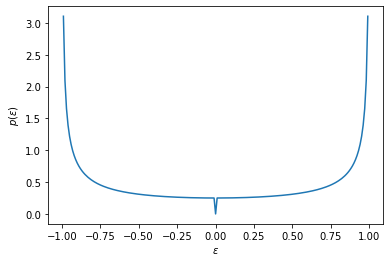

In [2]:
def p(epsilon):
    return (1/(2*epsilon**2))*((1/np.sqrt(1-epsilon**2)) - 1)

plt.plot(epsilon, p(epsilon))
plt.xlabel('$\epsilon$')
plt.ylabel('$p(\epsilon)$')
plt.show()

For a sampler that draws samples uniformly between $0$ and $1$, we must provide a prior transform that transforms to the parameter space of interest. This is given by the inverse of the cumulative distribution function (also known as the percent point function or quantile function, see https://dynesty.readthedocs.io/en/stable/quickstart.html?highlight=save#prior-transforms).

So, first we need to find the CDF:

$$ F(\epsilon) = \int_{-1}^{\epsilon} \mathrm{d}\epsilon' ~ p(\epsilon') = \frac{1 + \epsilon - \sqrt{1-\epsilon^2}}{2\epsilon} = \alpha. $$

Inverting, we get

$$ G(\alpha) = \frac{2\alpha - 1}{2\alpha^2 - 2\alpha + 1}. $$

This is the function we must apply to our samples drawn uniformly between $0$ and $1$, such that they follow the above distribution $p(\epsilon)$. 

<ipython-input-2-ed89b2d5fd6c>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1/(2*epsilon**2))*((1/np.sqrt(1-epsilon**2)) - 1)


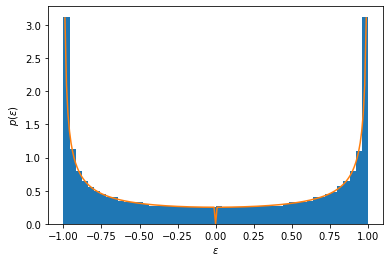

In [3]:
alpha = np.arange(0,1,0.001)
def G(alpha):
    return (2*alpha - 1)/(2*alpha**2 - 2*alpha + 1)

plt.hist(G(alpha), bins=50, density=True)
plt.plot(epsilon, p(epsilon))
plt.xlabel('$\epsilon$')
plt.ylabel('$p(\epsilon)$')
plt.show()